# RNN (Recurent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated Recurent Unit)

<img src='../0_resources/images/LSTM_VS_GRU.png' width='1400'/>

# RNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generate example data
X = np.random.rand(100, 10, 1) # 100 samples, 10 timesteps, 1 feature
y = np.random.randint(0, 2, size=(100,)) # generate random 100 values of 0 or 1

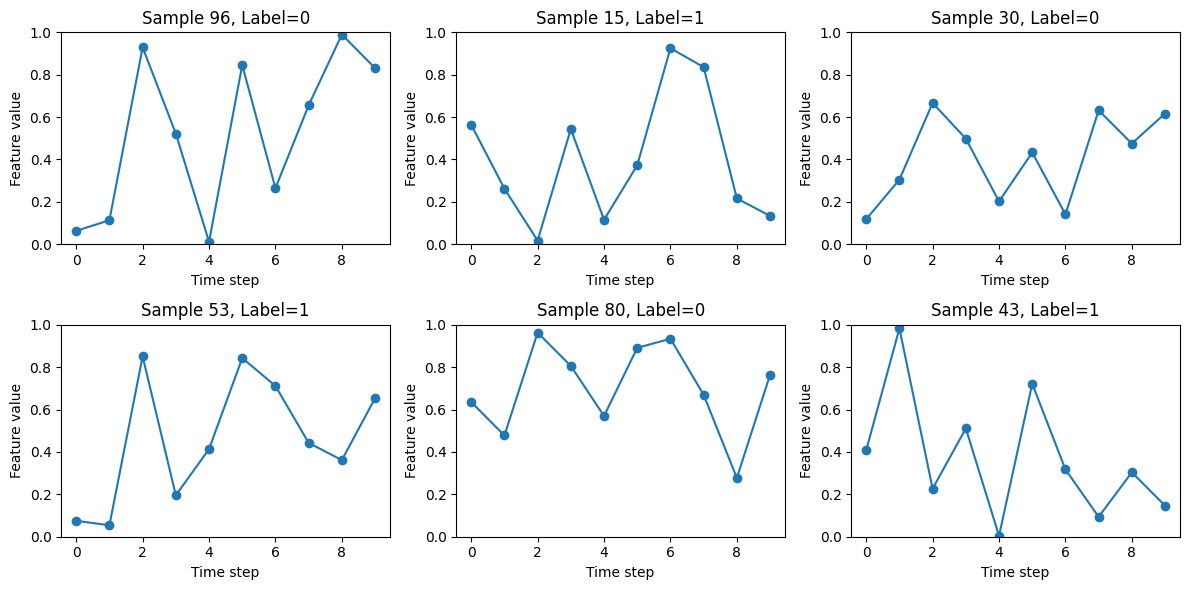

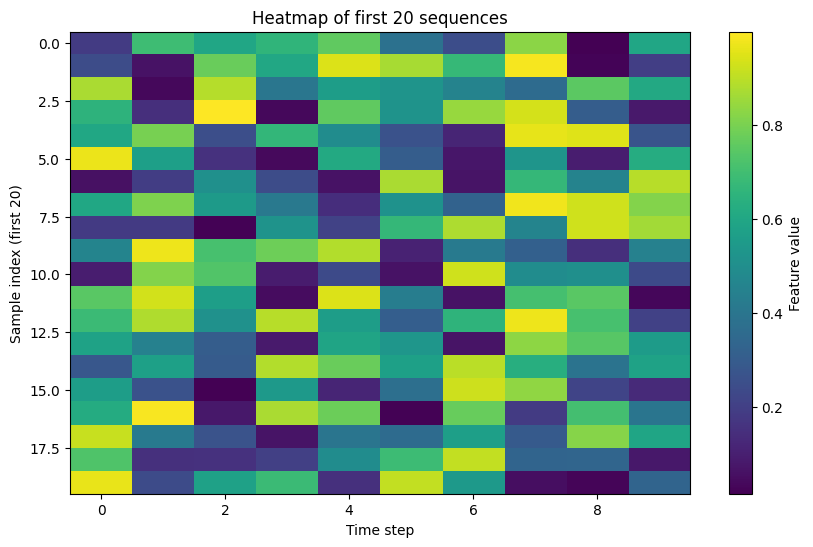

In [4]:
# ---- plot a few random sequences ----
plt.figure(figsize=(12, 6))
for i in range(6):  # show 6 random sequences
    idx = np.random.randint(0, len(X)-1) # Select a random index
    plt.subplot(2, 3, i+1)
    plt.plot(range(10), X[idx,:,0], marker='o')
    plt.title(f"Sample {idx}, Label={y[idx]}")
    plt.xlabel("Time step")
    plt.ylabel("Feature value")
    plt.ylim(0, 1)  # since np.random.rand
plt.tight_layout()
plt.show()

# ---- heatmap of first 20 samples ----
plt.figure(figsize=(10,6))
plt.imshow(X[:20,:,0], aspect='auto', cmap='viridis')
plt.colorbar(label="Feature value")
plt.xlabel("Time step")
plt.ylabel("Sample index (first 20)")
plt.title("Heatmap of first 20 sequences")
plt.show()


In [5]:
X.shape, y.shape # (100, 10, 1) # 100 samples, 10 features

((100, 10, 1), (100,))

In [6]:
y

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [7]:
# make data frame from X and y
df = pd.DataFrame(X.reshape(100, 10))
df['target'] = y

print(df.shape)
df

(100, 11)


,0,1,2,3,4,5,6,7,8,9,target
0,0.185948,0.692225,0.595856,0.658160,0.757990,0.382353,0.246456,0.827014,0.014467,0.596126,1
1,0.243509,0.062075,0.774581,0.604036,0.947460,0.871154,0.676209,0.985326,0.024431,0.198568,1
2,0.875322,0.036566,0.889407,0.400591,0.563813,0.524469,0.456650,0.358582,0.750322,0.610352,1
3,0.650926,0.147679,0.999665,0.037512,0.757668,0.521773,0.846888,0.935349,0.306258,0.080440,1
4,0.601748,0.798019,0.251391,0.668017,0.492991,0.264225,0.114939,0.963349,0.952134,0.269009,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.756696,0.994485,0.250776,0.338574,0.096964,0.217357,0.429067,0.927469,0.165059,0.622952,1
96,0.063201,0.113173,0.929123,0.522183,0.011281,0.845343,0.264594,0.655388,0.989635,0.831039,0
97,0.393133,0.293606,0.577866,0.239723,0.837041,0.282990,0.692546,0.723218,0.646624,0.493959,1
98,0.731659,0.603913,0.599154,0.502665,0.127612,0.624329,0.379985,0.737447,0.539631,0.547858,1


Text(0.5, 1.0, 'Example Time Series Data with label: 1')

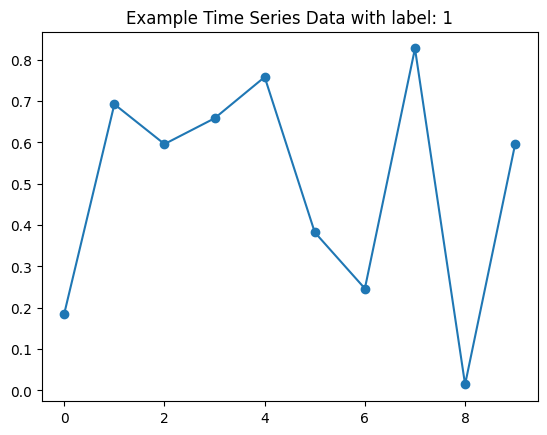

In [8]:
plt.plot(df.iloc[0, 0:-1], marker='o')
plt.title(f'Example Time Series Data with label: {df.iloc[0, -1]}')

In [9]:
# Define the model
model = Sequential([
    SimpleRNN(32, input_shape=(X.shape[1], X.shape[2])), # input_shape=(10, 1)
    Dense(1, activation='sigmoid') # Binary classification output - because y is binary
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10


2025-09-26 12:01:22.899871: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4946 - loss: 0.6921
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6028 - loss: 0.6757
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5884 - loss: 0.6714 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5655 - loss: 0.6865 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5853 - loss: 0.6771 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5414 - loss: 0.6891
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5799 - loss: 0.6676 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5580 - loss: 0.6829
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5884 - loss: 0.6674 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5468 - loss: 0.6786 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5810 - loss: 0.6693  
Test Loss: 0.6713066101074219
Test Accuracy: 0.5799999833106995


In [ ]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

input_shape = (10, 1)  # 10 timesteps, 1 feature
# --- LSTM ---
lstm_model = Sequential([
    LSTM(16, input_shape=input_shape),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model.fit(X, y, epochs=10, batch_size=32) # Train the model

# --- GRU ---
gru_model = Sequential([
    GRU(16, input_shape=input_shape),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model.fit(X, y, epochs=10, batch_size=32) # Train the model

print("\nLSTM summary:")
lstm_model.summary()
print("\nGRU summary:")
gru_model.summary()

# Evaluate the model
loss_lstm, accuracy_lstm = lstm_model.evaluate(X, y)
loss_gru, accuracy_gru = gru_model.evaluate(X, y)

print('LSTM: Test Loss and accuracy:', loss_lstm, accuracy_lstm)
print('GRU: Test Loss and accuracy:', loss_gru, accuracy_gru)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6103 - loss: 0.6593
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5782 - loss: 0.6627 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5395 - loss: 0.6788 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5978 - loss: 0.6629 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5681 - loss: 0.6638 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5646 - loss: 0.6651 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5561 - loss: 0.6769 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5830 - loss: 0.6667 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5530 - loss: 0.6693 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6120 - loss: 0.6634 
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5641 - loss: 0.6750 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6482 - loss: 0.6540 
Epo

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)


GRU summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5707 - loss: 0.6904  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4293 - loss: 0.7291  
LSTM: Test Loss and accuracy: 0.6906052231788635 0.5699999928474426
GRU: Test Loss and accuracy: 0.7286469340324402 0.4300000071525574


---

# LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [13]:
df.shape

(144, 1)

train data shape: (115, 1)
test data shape:  (29, 1)
train shape: (102, 12, 1) (102,)
test shape:  (16, 12, 1) (16,)
First training sample and its target value
[[-1.40066694]
 [-1.3349839 ]
 [-1.18172349]
 [-1.214565  ]
 [-1.30214239]
 [-1.14888197]
 [-1.00656872]
 [-1.00656872]
 [-1.1379348 ]
 [-1.32403673]
 [-1.48824432]
 [-1.3349839 ]] -1.367825421016439
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5246 - mae: 0.5660  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4016 - mae: 0.4881 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3397 - mae: 0.4431 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2149 - mae: 0.3551
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1818 - mae: 0.3238 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1453 - mae: 0.2919
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1709 - mae: 0.3308 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1754 - mae: 0.3358 
Epoch 9

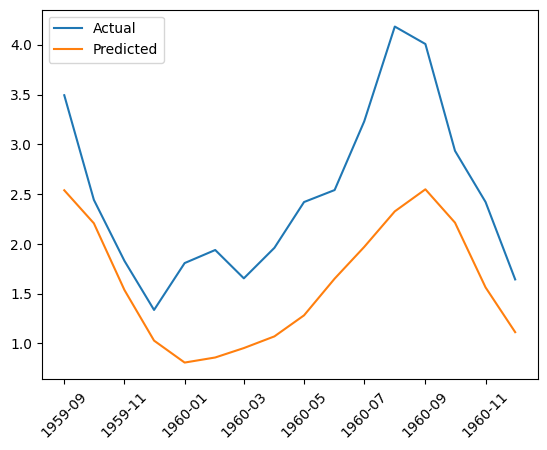

In [22]:

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print("train data shape:", train_data.shape)
print("test data shape: ", test_data.shape)

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std # standardize the training data using z-score normalization
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12 # sequence of 12 months
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

print("train shape:", X_train.shape, y_train.shape) # (102, 12, 1) (102,) --> 102 samples, 12 time steps, 1 feature
print("test shape: ", X_test.shape, y_test.shape)   # (16, 12, 1) (16,)
print("First training sample and its target value")
print(X_train[0], y_train[0])

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)), # shape is (time steps, features)
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print('Test Loss, mae:', loss, mae)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

# print("char_to_int", char_to_int)
print("Total sequences:", len(X))
print("First sequence and its target:")
print(X[0], '->', y[0]) # Example sequence

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Reshape and Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1) # pick a random value
pattern = X[start]
print("pattern: ")
print(pattern)

print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")
print("Pattern end:")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print("result: ", index, result, end=", ")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]
    # print("pattern: ")
    # print(pattern)

print("\n")


Total sequences: 41
First sequence and its target:
[7, 5, 9, 9, 12, 0, 17, 12, 14, 9] -> 4
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9403  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9188 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8895
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8510 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8357 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7833 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7600 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7512 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7613 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6982 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7821 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7412 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7764 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2

Here, we first convert our sample text into sequences of characters. Each sequence of characters (X) corresponds to a next character (y). The model is trained to predict y from X.

After training, we take a random seed sequence and use the model to predict the next 50 characters. The output will show the initial seed and the generated text based on it.

# GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1425  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1656 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9143 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8348
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6170 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5566
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4465 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3843 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2973 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2883 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2364 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1939 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2080 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1821 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1887
Epoch 16/100
4/4 ━

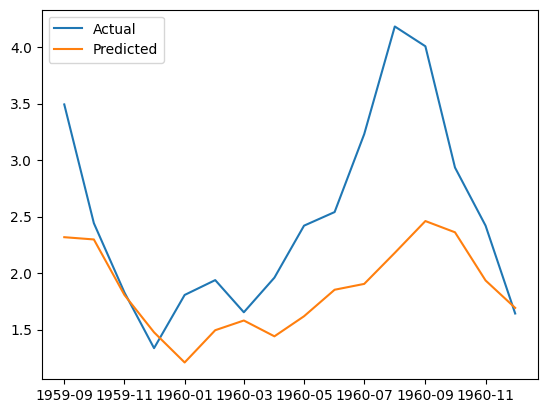

In [28]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()


# GRU on Text

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  # Import GRU instead of LSTM

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text)))  # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))  # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model using GRU
model = Sequential([
    GRU(128, input_shape=(X.shape[1], X.shape[2])),  # Change LSTM to GRU here
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50):  # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")
